Importing tools & libraries etc.

In [1]:
from __future__ import print_function
import numpy as np
from scipy import stats
import os
import json
import pylab as pl
from matplotlib import pyplot
import pandas as pd

import matplotlib
%matplotlib nbagg
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Loading the data 

In [2]:
fare = np.load('/home/cusp/cjs676/PUI2016_cjs676/HW9_cjs676/MTA_Fare.npy')
     

CHecking out the data. https://docs.scipy.org/doc/numpy-dev/user/quickstart.html#head-d55e594d46b4f347c20efe1b4c65c92779f06268

In [3]:
fare.size

2677200

In [4]:
fare.ndim

3

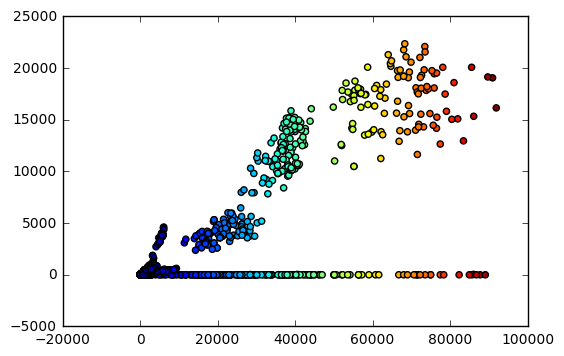

In [5]:
fig = pyplot.figure()
ax = fig.add_subplot(111, )

ax.scatter(fare[0], fare[1], c=fare[0])
pyplot.show()

In [6]:
print(len(fare[0][0]))


194


In [7]:
fare.shape

(600, 23, 194)

"600 Manhattan stations"
23 different cards
194 weeks from 5/21/2010 to 02/21/2014

In [8]:
print(fare)



[[[56961 64703 68002 ..., 36527 33929 36824]
  [ 1732  2083  2107 ...,  1264  1172  1238]
  [  203   276   245 ...,   186   167   167]
  ..., 
  [    0     0     0 ...,     0     0     0]
  [    0     0     0 ...,     0     0     0]
  [   -1    -1    -1 ...,  1121  1377   712]]

 [[16210 20179 21769 ...,    -1    -1    -1]
  [  503   647   665 ...,    -1    -1    -1]
  [   41    43    44 ...,    -1    -1    -1]
  ..., 
  [    0     0     0 ...,    -1    -1    -1]
  [    0     0     0 ...,    -1    -1    -1]
  [   -1    -1    -1 ...,    -1    -1    -1]]

 [[ 3292  3429  3629 ...,  3746  3406  3217]
  [  110    92   102 ...,   212   209   211]
  [    7     6    13 ...,    26    20    22]
  ..., 
  [    0     0     0 ...,     0     0     0]
  [    0     0     0 ...,     0     0     0]
  [   -1    -1    -1 ...,   573   761   288]]

 ..., 
 [[   -1    -1    -1 ...,    -1    -1    -1]
  [   -1    -1    -1 ...,    -1    -1    -1]
  [   -1    -1    -1 ...,    -1    -1    -1]
  ..., 
  [   -1  

Collecting some tools that may be useful following a google search

numpy.nansum(a, axis=None, dtype=None, out=None, keepdims=0)
    Return the sum of array elements over a given axis treating Not a Numbers (NaNs) as zero.
    
numpy.nan_to_num(x)[source]
    Replace nan with zero and inf with finite numbers


http://stackoverflow.com/questions/1800187/replace-values-in-an-array
x=np.array([[np.NaN, 1., 1., 1., 1., 1., 1.],[1., np.NaN, 1., 1., 1., 1., 1.],[1., 1., np.NaN, 1., 1., 1., 1.], [1., 1., 1., np.NaN, 1., 1., 1.], [1., 1., 1., 1., np.NaN, 1., 1.],[1., 1., 1., 1., 1., np.NaN, 1.], [1., 1., 1., 1., 1., 1., np.NaN]])
x[np.isnan(x)]=0

https://docs.scipy.org/doc/numpy-1.11.0/user/misc.html
The following corresponds to the usual functions except that nans are excluded from the results:

nansum()
nanmax()
nanmin()
nanargmax()
nanargmin()

>>> x = np.arange(10.)
>>> x[3] = np.nan
>>> x.sum()
nan
>>> np.nansum(x)
42.0

In [9]:
#Following an error, it seems I must convert the values in the array
fare = fare.astype(float)

In [10]:
#Filtering out the -1 to NaN
fare[fare == -1] = np.nan

Checking the results

In [11]:

print(fare)
#We now have nan instead of -1

[[[  5.69610000e+04   6.47030000e+04   6.80020000e+04 ...,   3.65270000e+04
     3.39290000e+04   3.68240000e+04]
  [  1.73200000e+03   2.08300000e+03   2.10700000e+03 ...,   1.26400000e+03
     1.17200000e+03   1.23800000e+03]
  [  2.03000000e+02   2.76000000e+02   2.45000000e+02 ...,   1.86000000e+02
     1.67000000e+02   1.67000000e+02]
  ..., 
  [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
     0.00000000e+00   0.00000000e+00]
  [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
     0.00000000e+00   0.00000000e+00]
  [             nan              nan              nan ...,   1.12100000e+03
     1.37700000e+03   7.12000000e+02]]

 [[  1.62100000e+04   2.01790000e+04   2.17690000e+04 ...,              nan
                nan              nan]
  [  5.03000000e+02   6.47000000e+02   6.65000000e+02 ...,              nan
                nan              nan]
  [  4.10000000e+01   4.30000000e+01   4.40000000e+01 ...,              nan
  

In [12]:
#Checking to ensure the size remained the same
fare.shape



(600, 23, 194)

"600 Manhattan stations" 23 different cards 194 weeks from 5/21/2010 to 02/21/2014

Additonal tools from Google search and the UInotebook 

np.nanmean(mtarides)
np.nansum(mtarides)

numpy.std(a, axis=None, dtype=None, out=None, ddof=0, keepdims=False)[source]
Compute the standard deviation along the specified axis.

Mistakes were made in version1 switching to ver2 for clarity

#lets figure out what axis the different variable are in.
numpy.ma.size

numpy.ma.size(obj, axis=None)[source]
    Return the number of elements along a given axis.
        https://docs.scipy.org/doc/numpy/reference/generated/numpy.ma.size.html

In [13]:
np.ma.size(fare, 0)

600

In [14]:
np.ma.size(fare, 1)

23

In [15]:
np.ma.size(fare, 2)

194

A bit obvious I guess but there it is.  

In [16]:
#Since I dont care about the different types of cards I guess I will just sum them up
all_fares = np.nansum(fare, 1)

In [18]:
all_fares.shape


(600, 194)

Now we have reduced some of the variables. 
I dont think I care about differences in the stations so I will just sum them up as well. 

In [20]:
dates_allsum = np.nansum(all_fares, 0)

In [21]:
dates_allsum.shape

(194,)

So I guess we have all the infromation summed on the week bin. (I hope)


In [27]:
print(dates_allsum)

[ 26720267.  29265971.  29601189.  29387592.  29185768.  26211666.
  28683614.  29125646.  28803814.  28599546.  28312019.  27931015.
  27271701.  28250357.  26687174.  30018756.  30183790.  29052100.
  30068614.  29172431.  30327068.  30190292.  29987273.  30053446.
  30128994.  25164391.  29189219.  30580790.  30106591.  27561217.
  21802973.  21796368.  27483123.  27112540.  26013915.  26433790.
  28660073.  29103923.  29576628.  26721588.  29180204.  29400660.
  29880586.  29677420.  29525360.  30175740.  30196675.  28500091.
  29035465.  30398309.  29992271.  29953470.  27148617.  29850111.
  30165985.  29979266.  30298087.  26744295.  29967687.  29475619.
  29253128.  29429842.  29063294.  27980138.  27924672.  22985008.
  28142943.  31996089.  32506259.  24297825.  32159233.  30747690.
  32641199.  32904387.  31953835.  32131041.  32477470.  27031175.
  31808940.  33123277.  33173847.  31934242.  24565703.  28049643.
  30004428.  28040469.  29387312.  31200600.  31673650.  31126

Usoing the example form the FireFighter notebook I am going to get the mean and std and then set a threshold

"The mean and stardand deviation of the time series can be used to set a 3-sigma threshold
every value that is more then 3 sigma's away from the mean can be flagged as an event"

SOme tools-> np.nanmean(mtarides) np.nansum(mtarides)
numpy.std(a, axis=None, dtype=None, out=None, ddof=0, keepdims=False)[source] Compute the standard deviation along the specified axis.

In [30]:
len(isnan(dates_allsum))

194

In [31]:
isnan(dates_allsum)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

I may not have any nan values.  

In [32]:
np.mean(dates_allsum)

29781349.87113402

In [33]:
np.nanmean(dates_allsum)

29781349.87113402

In [34]:
np.std(dates_allsum)

2983960.421700886